In [38]:
import os
import math
import numpy as np
from matplotlib import pyplot as plt

In [39]:
def power_radiated_in_angular_interval(farfield, ang_min=57, ang_max=75):
    
    Ex=farfield[:,1]; Ey=farfield[:,2]; Ez=farfield[:,3];
    Hx=farfield[:,4]; Hy=farfield[:,5]; Hz=farfield[:,6];
    Ex=np.conj(Ex); Ey=np.conj(Ey); Ez=np.conj(Ez);
    Px=np.real(np.multiply(Ey,Hz)-np.multiply(Ez,Hy))
    Py=np.real(np.multiply(Ez,Hx)-np.multiply(Ex,Hz))
    Pz=np.real(np.multiply(Ex,Hy)-np.multiply(Ey,Hx))
    Pr=np.sqrt(np.square(Px)+np.square(Py))
    Pnorm = Pr/max(Pr)
    ang_min = 57
    ang_max = 75
    ang_min = ang_min*np.pi/180
    ang_max = ang_max*np.pi/180
    idx = np.where((farfield[:,0] > ang_min) & (farfield[:,0] < ang_max))
    val = sum(Pnorm[idx])/sum(Pnorm)
    
    return val

def extract_parameters(filename):
    params = [float(p.split('-')[1]) for p in filename.replace('farfield_', '').replace('.npy', '').split('_')]
    return params

In [40]:
files = os.listdir('results/')

results = []

for filename in files:
    
    farfield = np.load('results/{}'.format(filename))
    val = power_radiated_in_angular_interval(farfield)
    
    params = extract_parameters(filename)
    
    if np.isnan(val):
        print('Warning: e:{}, a:{}, d:{} is NaN'.format(*params))
    else:
        results.append((*params, val))
    
results = np.array(results)

/home/quintsim2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/home/quintsim2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [41]:
np.unique(results[:,0])

array([0.    , 0.0667, 0.1334, 0.2001, 0.2668, 0.3335, 0.4002, 0.4669,
       0.5336, 0.6003, 0.667 ])

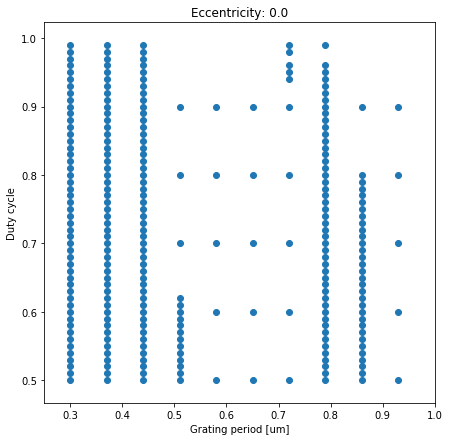

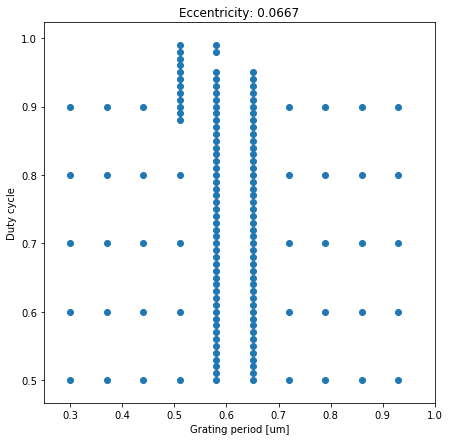

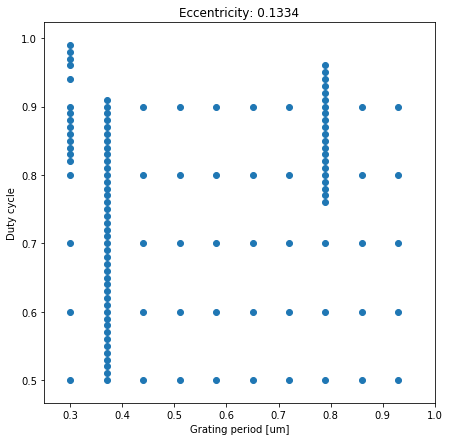

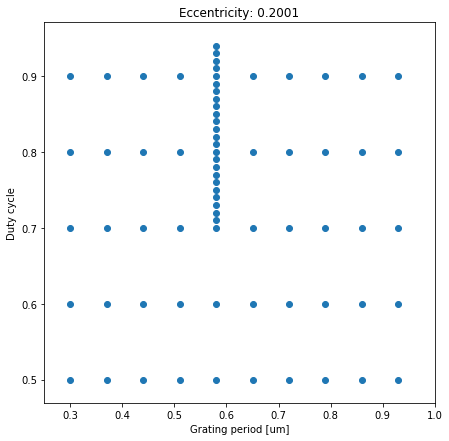

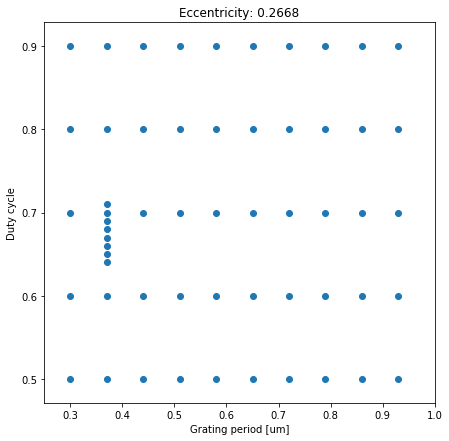

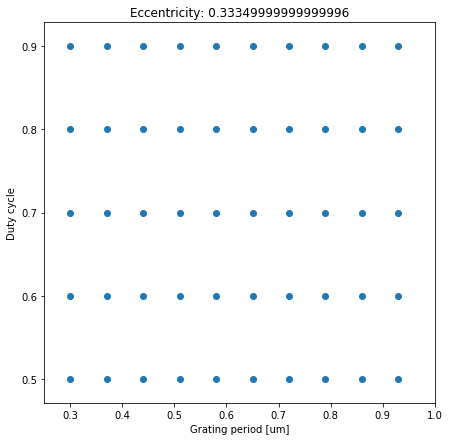

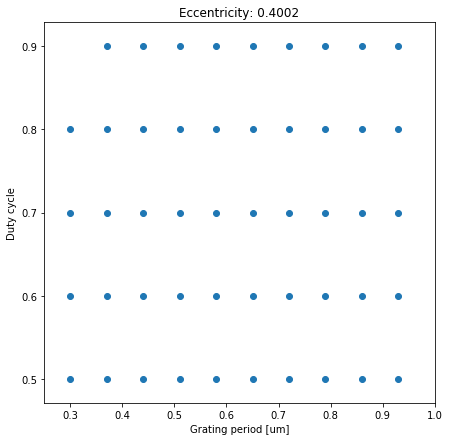

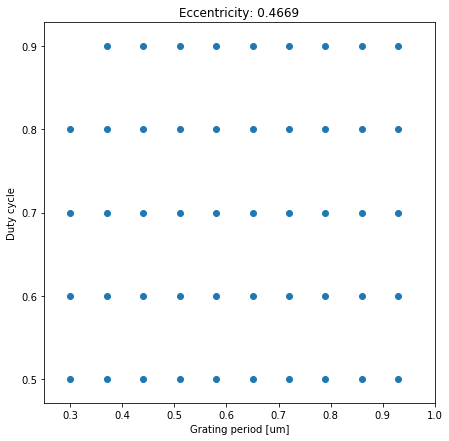

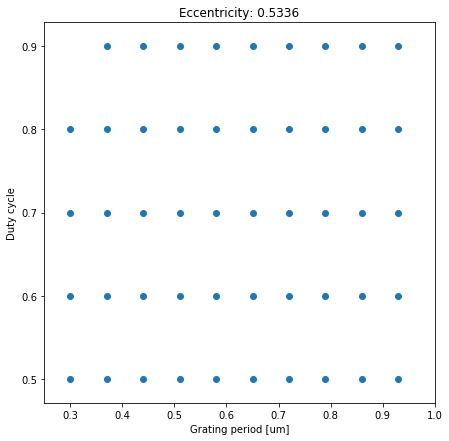

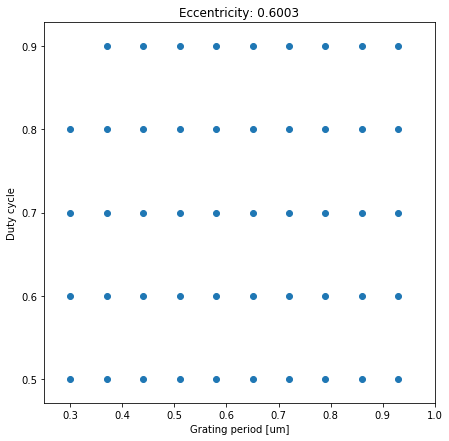

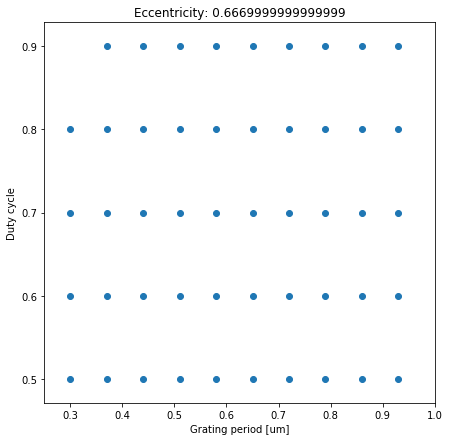

In [42]:
for e in np.unique(results[:,0]):
    
    idx = np.where(results[:,0] == e)
    plt.figure(figsize=(7, 7))
    plt.scatter(results[idx][:,1], results[idx][:,2])
    
    plt.title('Eccentricity: {}'.format(e))
    plt.xlabel('Grating period [um]')
    plt.ylabel('Duty cycle')
    
    plt.xlim(0.25, 1)

    plt.show()

In [43]:
ranges = (slice(0, 0.667, 0.0667), slice(0.3, 1, 0.07), slice(0.5, 1, 0.1))
grid = np.mgrid[ranges]

In [44]:
coords = []
vals = []

for a in range(grid.shape[2]):
    for d in range(grid.shape[3]):
        coord = grid[:,0, a, d]
        #print(coord)
        coords.append(coord)
        idx = np.where((results[:,0:3] == coord).all(axis=1))
        val = results[idx][0][3]
        #print(val)
        vals.append(val)

In [45]:
vals = np.flip(np.array(vals).reshape((grid.shape[2], grid.shape[3])), axis=0).T

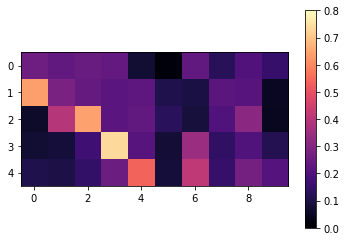

In [46]:
plt.imshow(vals, cmap='magma', vmin=0, vmax=0.8, interpolation='None')
plt.colorbar()

In [47]:
results[np.where(results[:,3] == np.nanmax(results[:,3]))]

array([[0.        , 0.79      , 0.72      , 0.79593428]])

In [48]:
results[np.where(results[:,3] == np.sort(results[:,3])[-13])]

array([[0.        , 0.86      , 0.67      , 0.67733794]])

In [49]:
results[np.where(np.isnan(results[:,3]))]

array([], shape=(0, 4), dtype=float64)

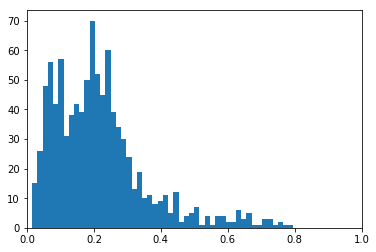

In [50]:
plt.hist(results[:,3], bins=50)
plt.xlim(0,1)
plt.show()

In [51]:
results[np.where(results[:,3] == 1)]

array([], shape=(0, 4), dtype=float64)